<a href="https://colab.research.google.com/github/Gnanavibs/Performing-Analysis-of-Meteorological-Data/blob/main/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib notebook

In [2]:
data = pd.read_csv('weatherHistory.csv' , parse_dates = ['Formatted Date'] , index_col = ['Formatted Date'])

In [4]:
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96453 entries, 2006-04-01 00:00:00+02:00 to 2016-09-09 23:00:00+02:00
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  int64  
 7   Visibility (km)           96453 non-null  float64
 8   Pressure (millibars)      96453 non-null  float64
 9   Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 8.1+ MB


In [6]:
data.isnull().sum() # there are 517 null columns

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [7]:
new_data = data.dropna() # remove null columns and store it in a new data set

In [8]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95936 entries, 2006-04-01 00:00:00+02:00 to 2016-09-09 23:00:00+02:00
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   95936 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           95936 non-null  float64
 3   Apparent Temperature (C)  95936 non-null  float64
 4   Humidity                  95936 non-null  float64
 5   Wind Speed (km/h)         95936 non-null  float64
 6   Wind Bearing (degrees)    95936 non-null  int64  
 7   Visibility (km)           95936 non-null  float64
 8   Pressure (millibars)      95936 non-null  float64
 9   Daily Summary             95936 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 8.1+ MB


In [9]:
new_data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000
mean,11.940976,10.862531,0.734841,10.804936,187.518773,10.362402,1003.150038
std,9.570671,10.717812,0.195724,6.920727,107.385351,4.173780,117.276976
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.604167,2.276389,0.600000,5.796000,116.000000,8.372000,1011.890000
50%,12.033333,12.033333,0.780000,9.933700,180.000000,10.046400,1016.420000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,1021.050000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [10]:
new_data.index = pd.to_datetime(new_data.index , utc =True)

Using Resample Function

In [11]:
resampled_data = new_data.resample('M').mean() # resample accroading to Month end ('M')

In [12]:
resampled_data.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Formatted Date,,,,,,,
2005-12-31 00:00:00+00:00,0.577778,-4.050000,0.890000,17.114300,140.000000,9.982000,1016.660000
2006-01-31 00:00:00+00:00,-1.677942,-4.173708,0.834610,8.894211,161.018817,7.894064,1021.204960
2006-02-28 00:00:00+00:00,-0.065394,-2.990716,0.843467,10.957008,197.886905,7.418794,995.183914
2006-03-31 00:00:00+00:00,4.559274,1.969780,0.778737,14.421488,195.059140,9.602590,976.436263
2006-04-30 00:00:00+00:00,12.635031,12.098827,0.728625,10.930670,191.877778,10.626760,1013.493694


In [13]:
resampled_data.tail()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Formatted Date,,,,,,,
2016-08-31 00:00:00+00:00,21.420296,21.383094,0.674046,9.151378,184.563172,13.948140,1018.026398
2016-09-30 00:00:00+00:00,18.467924,18.355833,0.688833,6.849029,177.738889,13.723260,1017.969736
2016-10-31 00:00:00+00:00,10.593141,9.825775,0.827951,11.075846,206.046914,9.208206,1017.725457
2016-11-30 00:00:00+00:00,5.158800,2.860089,0.848847,10.507636,163.690511,8.725824,1019.215737
2016-12-31 00:00:00+00:00,1.239158,-2.017272,0.887981,11.024860,179.064603,7.460627,1019.946339


In [14]:
resampled_data['month'] = resampled_data.index.month

In [15]:
resampled_data['year'] = resampled_data.index.year

In [16]:
resampled_data.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month,year
Formatted Date,,,,,,,,,
2005-12-31 00:00:00+00:00,0.577778,-4.050000,0.890000,17.114300,140.000000,9.982000,1016.660000,12,2005
2006-01-31 00:00:00+00:00,-1.677942,-4.173708,0.834610,8.894211,161.018817,7.894064,1021.204960,1,2006
2006-02-28 00:00:00+00:00,-0.065394,-2.990716,0.843467,10.957008,197.886905,7.418794,995.183914,2,2006
2006-03-31 00:00:00+00:00,4.559274,1.969780,0.778737,14.421488,195.059140,9.602590,976.436263,3,2006
2006-04-30 00:00:00+00:00,12.635031,12.098827,0.728625,10.930670,191.877778,10.626760,1013.493694,4,2006


In [17]:
resampled_data.index = resampled_data.index.date

In [18]:
resampled_data = resampled_data[1:] # remove column with year 2005 column

In [19]:
resampled_data.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month,year
2006-01-31,-1.677942,-4.173708,0.834610,8.894211,161.018817,7.894064,1021.204960,1,2006
2006-02-28,-0.065394,-2.990716,0.843467,10.957008,197.886905,7.418794,995.183914,2,2006
2006-03-31,4.559274,1.969780,0.778737,14.421488,195.059140,9.602590,976.436263,3,2006
2006-04-30,12.635031,12.098827,0.728625,10.930670,191.877778,10.626760,1013.493694,4,2006
2006-05-31,15.650732,15.539479,0.721801,10.174161,209.310484,11.748066,1016.629785,5,2006


In [20]:
# now we have to find avg apparent tempreature for month to month like april 2006 to april 2016
month_to_month_AT = {}
for month in range(1,13):
    month_to_month_AT[month] = list(resampled_data[resampled_data['month'] == month]['Apparent Temperature (C)'].values)

In [21]:
title = {1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',
         10:'Oct',11:'Nov',12:'Dec'}
def plot_AT_or_Humidity(what_for , month_dict):
    for index in range(1,13):
        t = title[index]
        plt.plot(range(2006,2017),month_dict[index])
        plt.title(what_for + ' for ' +t+' Month')
        plt.show()

In [22]:
# now we have to find avg apparent tempreature for month to month like april 2006 to april 2016
month_to_month_Humidity = {}
for month in range(1,13):
    month_to_month_Humidity[month] = list(resampled_data[resampled_data['month'] == month]['Humidity'].values)

In [23]:
# now we find difference
def find_avg_difference(month_dict):
    difference = []
    for month in range(1,13):
        difference.append(np.mean(month_dict[month]))
    return difference

In [24]:
AT_difference_monthly = find_avg_difference(month_to_month_AT)
Humidity_difference_monthly = find_avg_difference(month_to_month_Humidity)

Text(0.5, 1.0, 'Monthly Average Data(2006-2016) of AT')

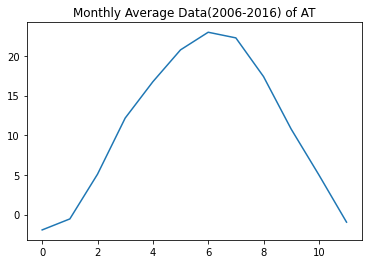

In [25]:
plt.plot(AT_difference_monthly)
plt.title('Monthly Average Data(2006-2016) of AT')

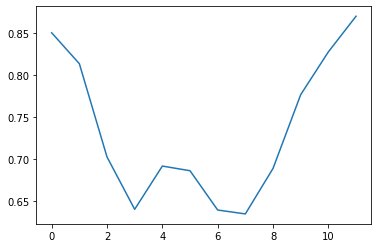

In [26]:
plt.plot(Humidity_difference_monthly)

Manually Resampling

In [27]:
new_data.index = new_data.index.date

In [28]:
new_data.index = pd.DatetimeIndex(new_data.index)

In [29]:
pd.options.mode.chained_assignment = None # remove unwanted SetupcopyWarning

In [30]:
new_data['month'] = new_data.index.month
new_data['year'] = new_data.index.year

In [31]:
def find_average_monthly_AT_or_Humidity(what_for):
    avg_data_tempreature_monthly = {}
    for year in range(2006,2017):
        for month in range(1,13):
            result = list(new_data.loc[(new_data['month'] == month)&(new_data['year']==year) , :][what_for].values)
            if month not in avg_data_tempreature_monthly:
                avg_data_tempreature_monthly[month] = [np.mean(result)]
            else:
                avg_data_tempreature_monthly[month].append(np.mean(result))
    return avg_data_tempreature_monthly

In [32]:
AT_monthly_average = find_average_monthly_AT_or_Humidity('Apparent Temperature (C)')
Humidity_monthly_average = find_average_monthly_AT_or_Humidity('Humidity')

Humidity is the amount of water vapor in the air.

In [33]:
AT = pd.DataFrame(AT_monthly_average)
AT['year'] = range(2006,2017)

In [34]:
H = pd.DataFrame(Humidity_monthly_average)
H['year'] = range(2006,2017)

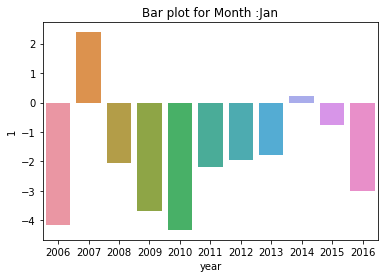

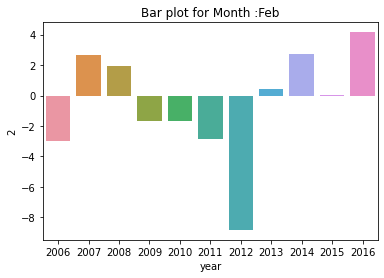

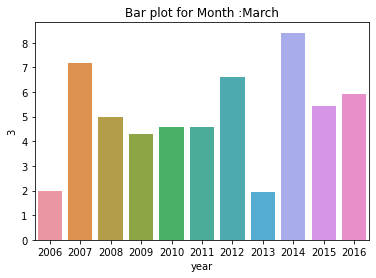

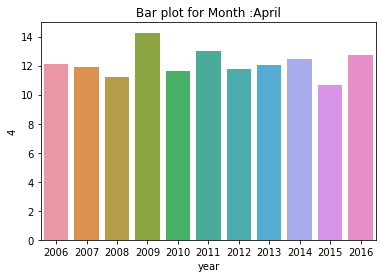

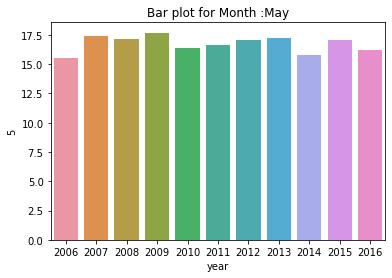

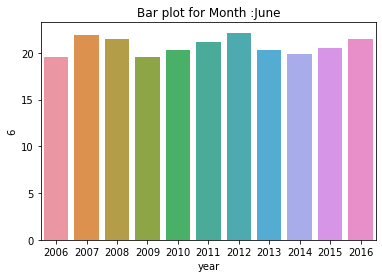

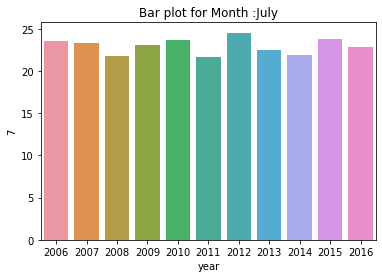

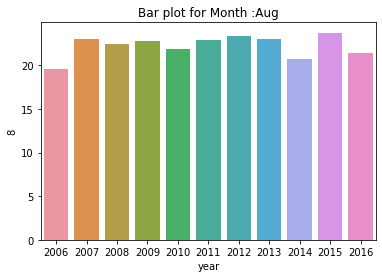

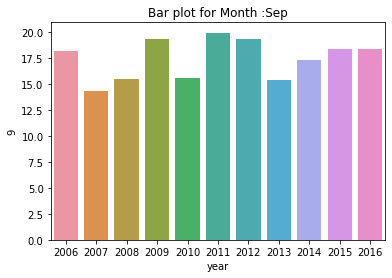

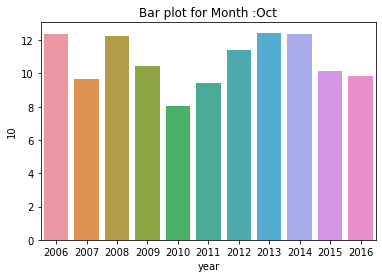

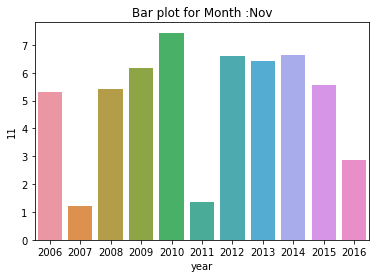

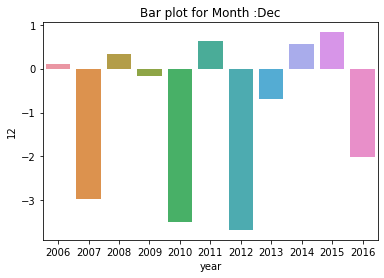

In [35]:
for month in range(1,13):
    sns.barplot(x = AT['year'] , y = AT[month])
    
    plt.title('Bar plot for Month :' + title[month])
    plt.show()

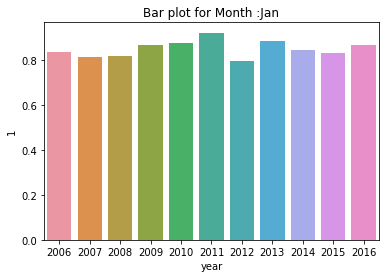

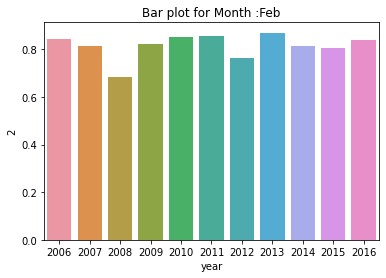

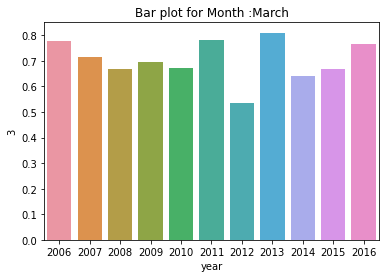

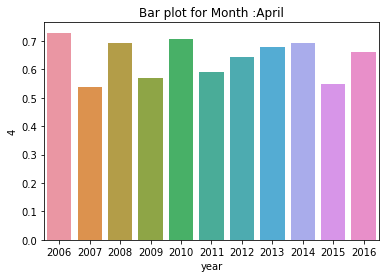

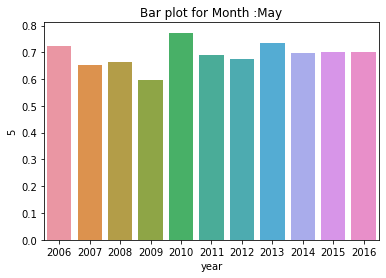

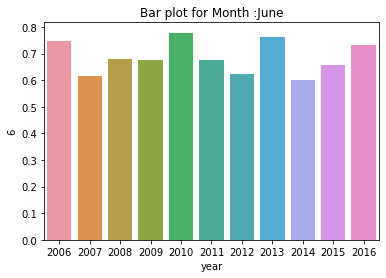

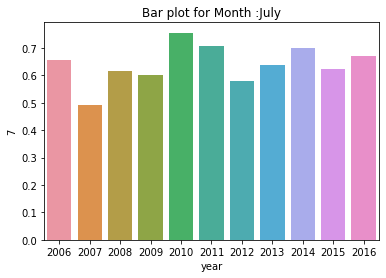

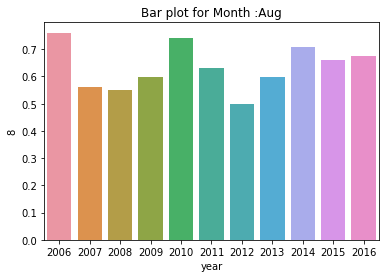

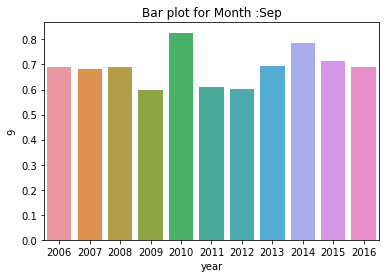

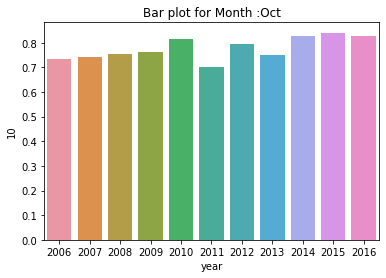

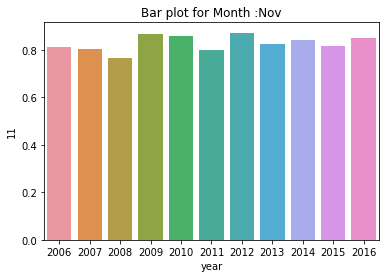

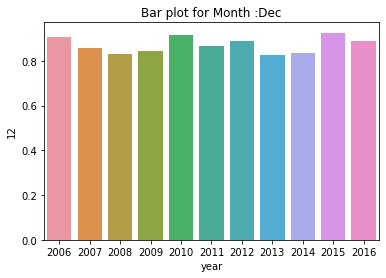

In [36]:
for month in range(1,13):
    sns.barplot(x = H['year'] , y = H[month])
    
    plt.title('Bar plot for Month :' + title[month])
    plt.show()

In [37]:
def plot_Humidty_and_AT():
    for month in range(1,12):
        plt.plot(range(2006,2017),AT_monthly_average[month] , label = 'AT' , color = 'red')
        plt.plot(range(2006,2017),Humidity_monthly_average[month] , label = 'Humidity')
        plt.legend()
        plt.title('AT and Humidity (Without Normalization) for Month : '+ title[month])
        plt.show()

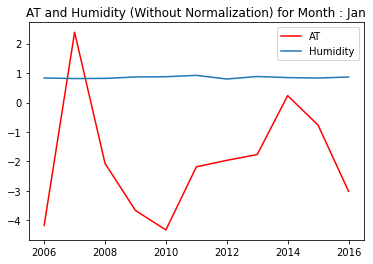

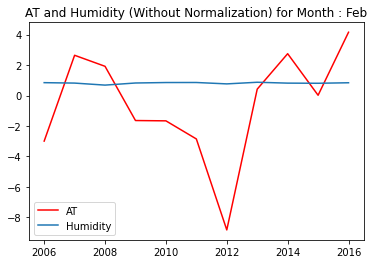

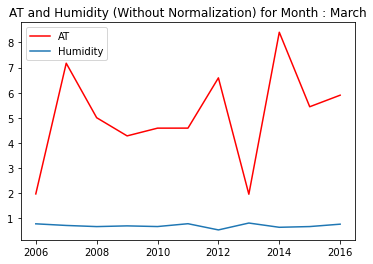

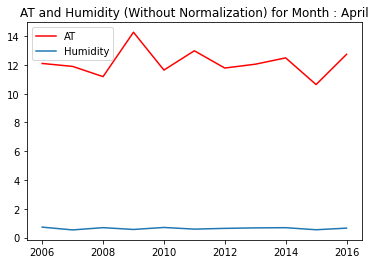

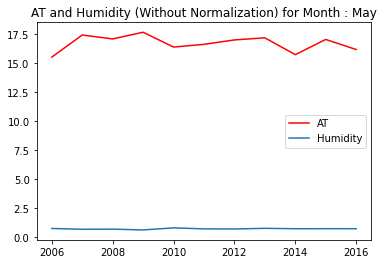

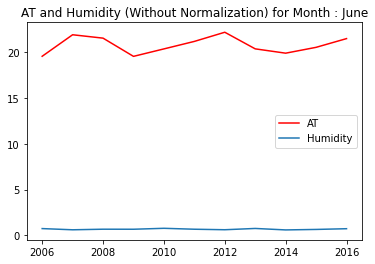

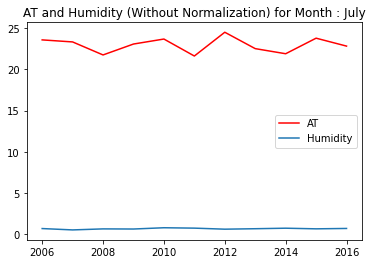

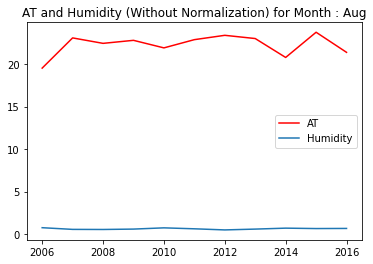

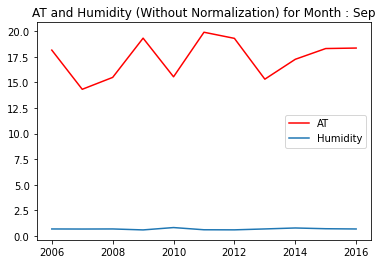

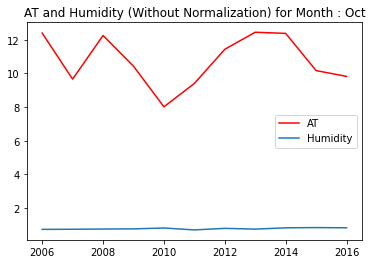

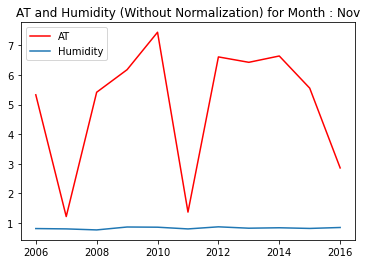

In [38]:
plot_Humidty_and_AT()